# Regression Basics I
Lecture notes by
_Sunil Paul_

- The materials in this notebook is prepared using “Diebold, F.X. (2019), Econometric Data Science: A Predictive Modeling Approach, Department of Economics, University of Pennsylvania,
http://www.ssc.upenn.edu/~fdiebold/Textbooks.html.”- 

- We use Current Population Survey (CPS) datasets. For details refer the Appendix of the text


## Introduction
We already saw how _random assignment_ resolve the problem of selection bias (A special case of endogenity) Provided you get the design of your experiment right, all you need to do is to compare mean values across the two groups ($D_i = 0; D_i = 1$). If done right, a pure randomized experiment is in many ways the most convincing method of evaluation. But
- It is often expensive to do experiements in social sciencies 
- It is very difficult to generalise the results as it is i) hard to replicate ii) sample specific and programe specific
- there can be many practical concerns in the design and implimentation.

For these reasons, most empirical research is still based on non-experimental (observational) data.
When we have non-experimental data, we must assume that individuals at least partly determine whether
they receive treatment. WE can still use randomised trails as our benchmark.

## Regression Basics
Assume we are interested in the questions given below
- Does your education has anything to do with your salary?
- How experience increases your salary?

Let us have a look into the data. 

### Preparing the data

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




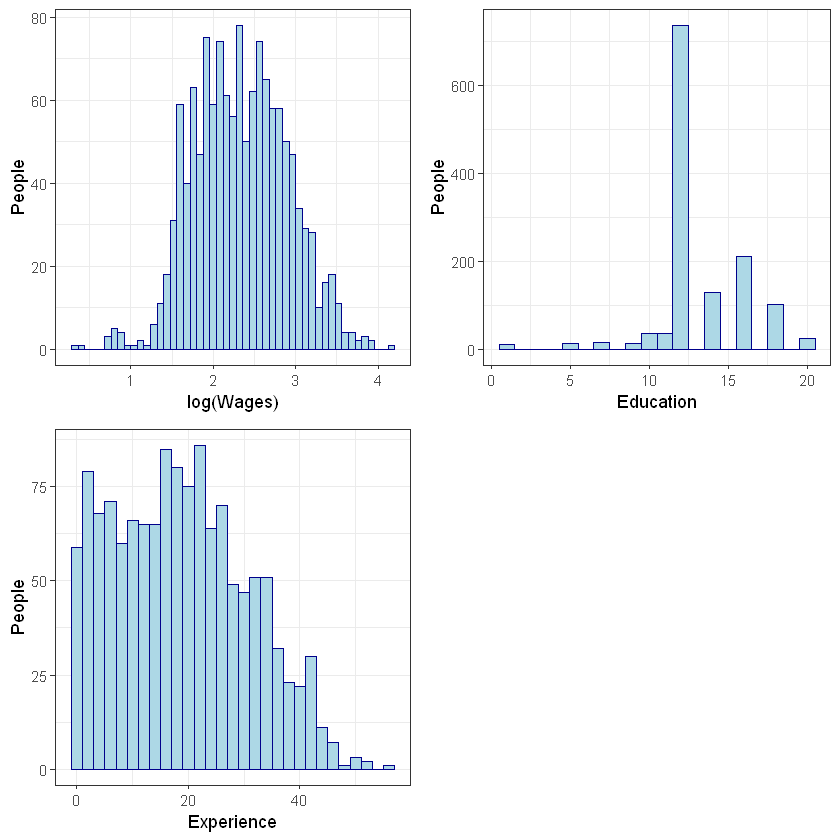

In [1]:

options(warn=-1) # to hide the warning
# Install required packages
library(ggplot2)
library(lmtest)
library(sandwich)
library(gridExtra)

#Data
### we take the data on wages , experience and eduction for our excample
wage95 <- read.csv("DataWages.csv", header=TRUE)
wages <- wage95$WAGE
lnwages <- wage95$LNWAGE
edu <- wage95$EDUC
exper <- wage95$EXPER

# Plots(histographs) using ggplot
h1 <- ggplot()+ geom_histogram(aes(lnwages),binwidth=0.08,color="darkblue", fill="lightblue")+
geom_density(color = "red")+
theme_bw()+xlab("log(Wages)")+ylab("People") 
h2<- ggplot()+ geom_histogram(aes(edu),binwidth=1,color="darkblue", fill="lightblue")+
theme_bw()+xlab("Education")+ylab("People")
h3<- ggplot()+ geom_histogram(aes(exper),binwidth=2,color="darkblue", fill="lightblue")+
theme_bw()+xlab("Experience")+ylab("People")

grid.arrange(h1, h2,h3, ncol=2)

## Regression as Curve fitting
 Consider a simple regression with on dependent variable $y_i$ and one independent variable $x_i$.
 
Then the regression tries to fit a line i.e $y_i=\beta_1+\beta_2x_i$ that minimises the devivation from data to the line estimated. 

In general, a 'quantratic loss' fuction9Mean square error) is used to find the "best fit)
$$\min_{\beta_1,\beta_2} \sum_{i=1}^{N}(y_i-\beta_1-\beta_2x_i)^2= Q$$

Following graph displays the scatter plot and regression line fitted with log( wages) as a function of education.

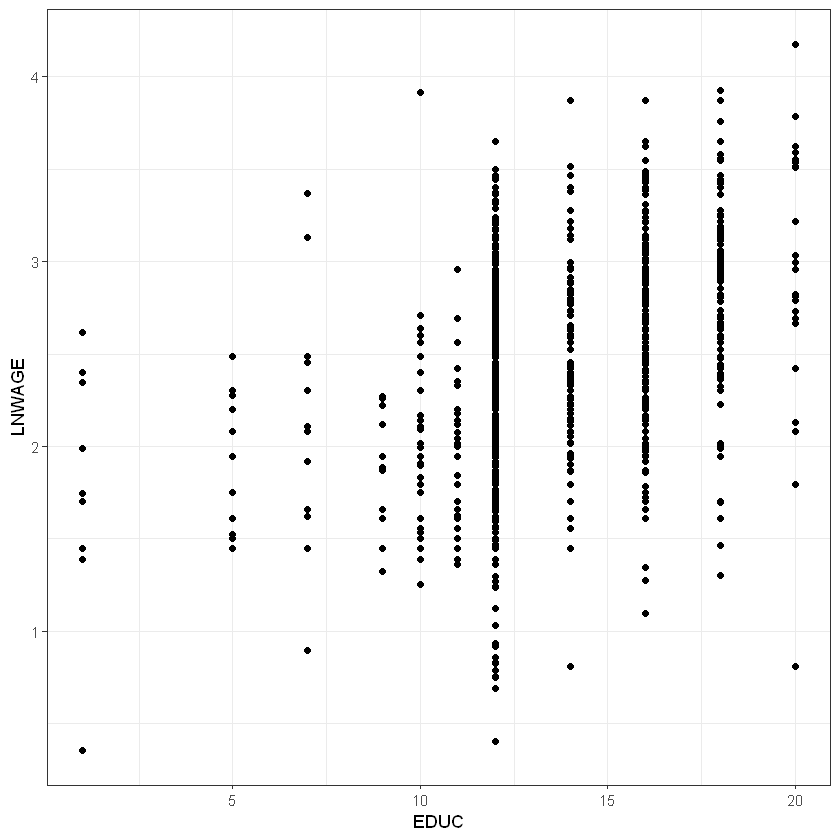

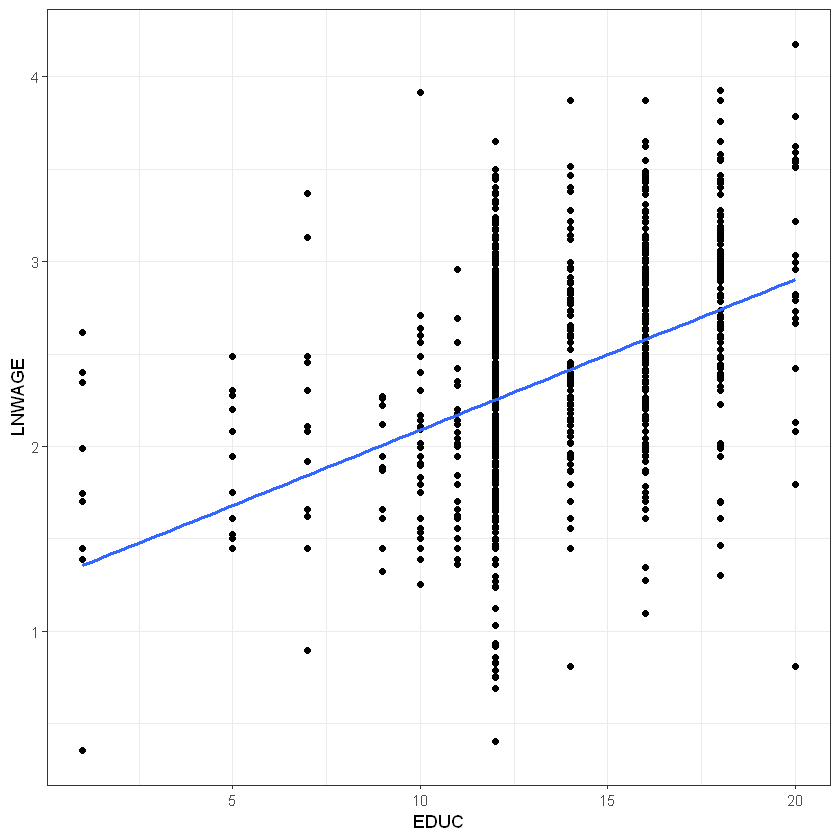

In [2]:
p <- ggplot(data=wage95, aes(y=LNWAGE,x=EDUC))+geom_point()+theme_bw()
p

p+geom_smooth(method=lm, formula = y ~ x, se = FALSE)


### Derivation of $\hat{\beta}_1$ and $\hat{\beta}_2$ 

It is very easy to derive the expression to calculate the $\beta$s by minimising the quntratic loss function. The details are given below: 

Differenciate $Q(\beta_1,\beta_2)$ w.r.t $\beta_1$ and $\beta_2$

$$\frac{\partial Q}{\partial{\beta_1}}=2\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)(-1)=0$$
$$\frac{\partial Q}{\partial{\beta_2}}=2\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)(-x_i)=0$$
solve the above equation for $\beta_1$ and $\beta_2$

Consider the first Normal equation$$
\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)=0$$

$$\sum_{i=1}^{N}y_i-N{\beta}_1-{\beta}_2\sum_{i=1}^{N} x_i=0$$
Dividing the above equation by N we have 
$$\bar{y}-{\beta}_1-{\beta}_2\bar{x}$$
$$\therefore \hat{\beta_1}=\bar{y}-\hat{\beta}_2 \bar{x}$$ 
(we use $\hat{}$ to indicate the estimator of parameter of interest)

Consider the second Normal equation$$
\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)(-x_i)=0$$

$$\sum_{i=1}^{N}y_ix_i-{\beta}_1\sum_{i=1}^{N}x_i-{\beta}_2\sum_{i=1}^{N} x_i^2=0$$
Dividing the above equation by N we have 
$$\frac{1}{N}\sum_{i=1}^{N}y_ix_i-{\beta}_1\bar{x}-{\beta}_2\frac{1}{N}\sum_{i=1}^{N} x_i^2=0$$
substituting $\hat{\beta_1}=\bar{y}-\hat{\beta}_2 \bar{x}$ and solving for $\hat{\beta}_2$ we get
$$\hat{\beta}_2=\frac{\frac{1}{N} \sum_{i=1}^{N} y_ix_i-\bar{y}\bar{x}}{\frac{1}{N} \sum_{i=1}^{N}x_i^2-\bar{x}^2}$$


Alternative expressions 

$$\hat{\beta}_2=\frac{\sum (y_i-\bar{y})(x_i-\bar{x})}{\sum (x_i-\bar{x})^2}$$
Alternative expression 
$$\hat{\beta}_2=\frac{Cov(y,x)}{Var(x)}$$

#### Actual Values, Fitted Values and Residuals
In the context of simple regression we have 
- Actual values: $y_i; i = 1,2,..., N$

- Least-squares fitted parameters:$\beta_1$ and $\beta_2$

- Fitted values: $\hat{y}_i = \hat{\beta}_1 + \hat{\beta}_2 x_i; i = 1,2,..., N$

- Residuals: $e_i = y_i − \hat{y}_i; i = 1,2,..., N$

The line that fits the scatter plot can be estimated using least square is given as follows:
$$\hat{lwages}=1.273+0.081 EDUC$$

### Multiple Linear Regression (K RHS Variables)
Simple regression can be extented by incorporating more explanatory variables($x$s).

The unkown $\beta$s of Multiple regression can be estimated by solving :
 $$\min_{\beta_1,...,\beta_k} \sum_{i=1}^{N}(y_i-\beta_1-\beta_2x_i-...-\beta_k x_k)^2$$

fitted hyperplane: $$\hat{y}_i = \sum_{k=1}^{K}\hat{\beta}_k x_{ik};$$ $ i = 1,2,..., N, x_{1k}=1$ for all $i$



#### Multiple regression in Matrix form
 We can represent the multiple regresss more compactly in matrix form as follows
 $$y=X\beta+\varepsilon$$ where
$$ y=\begin{pmatrix}y_1\\y_2\\\vdots\\y_N\end{pmatrix}$$
$$X =\begin{pmatrix}1&x_{12}&x_{13}&\ldots&x_{1k}\\1&x_{22}&x_{23}&
\ldots&x_{2k}\\ \vdots&&&&\\1&x_{N2}&x_{N3}&\ldots&x_{Nk}\end{pmatrix}$$  

$$\beta= \begin{pmatrix}{\beta_1}\\ {\beta_2}\\ {\vdots}\\{\beta_k}\end{pmatrix}$$ and 
$$\varepsilon=\begin{pmatrix}{\varepsilon_1}\\ {\varepsilon_2}\\ {\vdots}\\{\varepsilon_N}\end{pmatrix}$$
or
 $${y}_i = \sum_{k=1}^{K}{\beta}_k x_{ik}+\varepsilon_i;$$ $ i = 1,2,..., N, x_{1k}=1$ for all $i$



In matrix notation the curve fitting problem can be represented as
$$\min_{\beta}((y-X\beta)'(y-X\beta))$$ 

Let $$Q=(y-X{\beta})^{\prime }{(y-X{\beta})}$$
 and expanding Q we get

$$Q={y}^{\prime }y-{y}^{\prime }X{\beta}-{
\beta}^{\prime }{X}^{\prime }{y+{\beta}}^{\prime }{
X}^{\prime }{X{\beta}}$$

The first order condition for this minimizartion problem is given as follows

$$\frac{\partial Q}{\partial {\beta}}{=0\Longrightarrow -X}%
^{\prime }{y-X}^{\prime }{y+2X}^{\prime }{X{\beta}=0%
}$$



giving the normal equations*

$${(X}^{\prime }{X){\beta}=X}^{\prime }{y}$$

Solving the normation equations for $\beta$ we get:

$${\hat{\beta}_{LS}=(X}^{\prime }{X)}^{-1}{X}^{\prime }{y}$$

(_*Note_: The first term in $yy^{\prime }-2{\beta}^{\prime}X^{\prime }y+{\beta}^{\prime }X^{\prime }X{\beta}$ contains no ${\beta}$, the second term is linear in ${\beta}$ since $X^{\prime }y$ is a column vector of known numbers and we use the fact $\frac{\partial (a^{\prime }b)}{\partial b}=\frac{\partial (b^{\prime }a)}{\partial b}=a$. The third term is asymmetric quantratic form in b and $\frac{\partial (b^{\prime }Ab)}{\partial b}=2Ab.$)

**Example 1**
Given the following sample data for a model 


$$y=
\begin{bmatrix}
3 \\ 
1 \\ 
8 \\ 
3 \\ 
5
\end{bmatrix}
$$

and 
$$X=
\begin{bmatrix}
1 & 3 & 5 \\ 
1 & 1 & 4 \\ 
1 & 5 & 6 \\ 
1 & 2 & 4 \\ 
1 & 4 & 6
\end{bmatrix} $$

Then $$X^{\prime }X=
\begin{bmatrix}
5 & 15 & 25 \\ 
15 & 55 & 81 \\ 
25 & 81 & 129%
\end{bmatrix}%
$$ and $$X^{\prime }y=%
\begin{bmatrix}
20 \\ 
76 \\ 
109%
\end{bmatrix}
$$

The normal equation (${(X}^{\prime }{X){\beta}=X}^{\prime }{y}$) in this case would be\\

$$%
\begin{bmatrix}
5 & 15 & 25 \\ 
15 & 55 & 81 \\ 
25 & 81 & 129%
\end{bmatrix}%
$$%
$$
\begin{bmatrix}
\hat{\beta}_{1} \\ 
\hat{\beta}_{2} \\ 
\hat{\beta}_{3}%
\end{bmatrix}%
=%
\begin{bmatrix}
20 \\ 
76 \\ 
109%
\end{bmatrix}%
$$

Using  $\hat{\beta}=(X^{\prime }X)^{-1}X^{\prime }y$. 

In [11]:
xx<- matrix(c(5,15,25,15,55,81,25,81,129),nrow=3)
xy <-matrix(c(20,76,109),nrow=3)

solve(xx)%*%xy

4.0
2.5
-1.5



Thus, $\hat{\beta}$ is 

$
\begin{bmatrix}
4 \\ 
2.5 \\ 
-1.5
\end{bmatrix}
$

## Regression as a probability Model

### A Population Model and a Sample Estimator
Regression captures relation ship between dependent($y$) and a set of  independent variables($x$s). In addition to independent variables we include a randomly distributed error term to account for other unobervered factor as follows:
$$y=X\beta+\varepsilon$$
$$\varepsilon \sim N(0,\sigma^2 I)$$

Assume the above eqation capture the true relation in the polupation. However we may no be able to get observation for all the elements in a population and we need to infer about this model using the data of relevent variables from random samples taken from the population.

In brief we can spcify the data generating process of in terms of regression model and an error term as follows:


### Ideal conditions (IC)
The assumptions about  the model given below helps us to estimate and infer about the parameters. The LS estimators will have some desriable properties (for e.g. estimators will be unbiased, efficient and consistent) 

1. The data-generating process (DGP) is:
$$y=X\beta+\varepsilon$$
$$\varepsilon \sim N(0,\sigma^2 I)$$ and the fitted model matches it exactly.

    1. The fitted model is correctly specified
    2.  The disturbances are Gaussian
    3.  The coefficients$(\beta)$ are fixed
    3. The relationship is linear
    4. $Var(\varepsilon)=\sigma^2I$; variance of error are constant
    5. $E(\varepsilon_i\varepsilon_j)=0;i\ne j$ errors are uncorrelated
2. $E(\varepsilon X)=0 $  errors are  independent of $X$
    1. $E(\varepsilon|X)=0$
    2. $Var(\varepsilon|X)=\sigma^2$
    
   Sample counterpart of population regression 
    $$y=X \hat{\beta}+e$$
    where $\hat{\beta}$ is the sample estimator of population parameter $\beta, e$ is the estimated value of $\varepsilon$ and we define $s^2$ asthe samaple estimator of error variance $\sigma^2$ 
    
Applying least square principle we can estimate the $\beta$s as  appropriate elements of $(X'X)^{-1}X'y$ and the standraed error of the coefficicents is the digaonal elements of $\sqrt{s^2(X'X)^{-1}}$ and $s^2$ is the estimate of error variance(defined in section 4 below)
    
- The standard errors of the estimated coefficients indicate their reliability (sampling variance)

## Large-Sample Distribution of $\beta_{LS}$

We have defined population regression (we consider a simple regression for the ease of discussion but can be generalised ) as $Y=\beta_1 +\beta_2 X+\varepsilon,$where $\beta_1,\beta_2 $ and $\sigma ^{2}$ are population parameters of interest. We can estimate these parameters from observable values of $X$ and $Y$ using least square principle($\min_{\beta_1,\beta_2} \sum_{i=1}^{N}(y_i-\beta_1-\beta_2x_i)^2$ where $y_i-\beta_1-\beta_2x_i=\varepsilon_i$).

Suppose we estimated the unknown parameters using LS estimators from a given sample. Then can we consider the computed values as a good estimate of  unknown parameter?. Answer to this question depends on the properties of estimator (the formula we used to estimate it). To understand the statistical properties of LS estimators we need to consider its sampling distribution. A sampling distribution describes the behavior of the estimators in repeated application of the estimating formulae. Suppose we estimate $\widehat{\beta_2 }$ repeatedly from say 2000 times from 2000 different samples. Then we gets different estimate for $\beta_2$ each time since the sample differ each time. The sampling distribution describe how these estimators are distributed. The properties of sampling distribution of an estimators depends on the data generating  process so an estimator may be good in one context and bad in another. 

Let us discuss it in different perspective. Considering the population regression function it is clear that given the values of $x$ the the source of variation in $y$ from one sample to another is the variation in the error term. Hence the random component in y is due to the error. Now consider the LS estimator $\widehat{\beta_2 }=\frac{Cov(Y,X)}{Var(X)}$. Note that$Cov(X,Y)$ depends on the values of $Y$ and $Y$ on error terms $\varepsilon$. Thus if the
values of the disturbance term had been different in the n observations, we would have obtained different values of Y,and hence a different $Cov(X,Y)$ and consequently a different $\widehat{\beta_2}$. In summary the sample values of $\widehat{\beta_2 }$ depends on how assumptions regarding the error term. That is reason why assumptions under IC are very important intraditional econometric analysis Under IC we have assumed that $\varepsilon \sim
iidN(0,\sigma ^{2})$and $E(X,\varepsilon)=0.$ Using these assumptions we can derive the sampling distributions of LS estimators. In the case of simple regression $\widehat{\beta_2 } \sim N(\beta_2,V(\beta))$.

### Under the IC
In general $\beta_{LS}$ is consistent and asymptotically normally distributed with covariance matrix V,

$$\hat{\beta}_{LS}\stackrel{a}{\sim} N(\beta,V)$$

we estimate $V$ using $$\hat{V}= s^2(X'X)^{-1},$$ where $$s^2=e'e=\frac{\sum_{i=1}^{N}e_i^2}{N-K}.$$
We will use these results for hypothesis testing

## Hypothesis Tests and associated concepts*

Once estimation is over we can use it make inference about the population parameter (or can test the hypothesis about the population parameter).The following section defines some of the related concepts

### A statistical hypothesis

A statistical hypothesis  is a statement about the values of some population
parameters of interest.

#### Null Hypothesis: 

The hypothesis we are testing is often called as null hypothesis denoted by $H_{0}.$ The $H_{0}$ specifies some aspect of the distribution of variables under consideration. The null hypothesis of \ $\beta_2 =0$ in a bivariate
regression model implies that there is no relation between $x$ and $y$

#### Test Statistics and its distribution

To test the consistency of the $H_{0}$ with the data we require a test statistics say $TS.$ The test statistics is often computed using the estimators. Hence the distribution of $TS$ depends on the distribution of estimators. Similarly the distribution of test statistics is considered by placing restrictions implied by the null hypothesis. Given the sample
observations we can \ then calculate the value of test statistics ,let us denote this realization of $TS$ \ as $ts$. Then the consistency of data with the hypothesis can be tested by looking into the probability of getting that
particular sample statistics from the distribution of test statitcs $TS$ under the null.

In summary the TS can be considered as a test statistics for $H_{0}$ if
- the distribution of TS under null is known and
- larger the absolute value of $ts$ the greater the evidence of departure from $H_{0}$ with repect to a two sided hypotheis testing

Note: Given the particular $ts$ \ from a sample, the departure from $H_{0}$ can be specified  two ways: one sided and two sided. If we are considering the departure from H$_{0}$ in terms of $abs(ts)$ then it is a two sided test.

In general, the departure from $H_{0}$ can be defined in terms of the marginal level of significance (msl) or**p-values** as follows:

One sided positive msl: msl$^{+}=p(TS\geq ts|H_{0})$

(It can be read as follows: One sided positive msl  is the probability under $H_{0}$ that the random variable $TS$ is greater than or equal to the realization of the test statistic.)

One sided negative msl: msl$^{^{\_}}=p(TS\leq ts|H_{0})$

Two sided msl: msl $=p(abs(TS)\geq abs(ts)|H_{0})$

#### Test Statistics for LS estimators under normality with known $\sigma ^{2}$

We have already discussed the sampling distribution of LS estimators in section4
For illustrative purpose consider the slope coefficient.

$\hat{\beta_2}\sim N(\beta_2,var(\hat{\beta}_2))$ 

Given the above information we can compute a test statistics as follows

$Z_\hat{\beta_2}=\frac{\hat{\beta_2}-\beta_2 }{S.E(\hat{\beta}_2)}\sim N(0,1)$ 
where $Z\hat{\beta}_2$ is the test statistics and $S.E(\beta)$ is the standard error of $\hat{\beta}_2$ with is equal to $\sqrt{\sigma^{2}/\sum(x_i-\bar{x})^2}$.
Thus if the $\varepsilon_{i}$ are normally distributed then the distribution of teststatistics for $\hat{\beta_2}$ will be a standard normal given the known $\sigma ^{2}$
Given $H_{0}:\beta_2 =0$ we get

$Z_{\hat{\beta_2 }}=\frac{\hat{\beta_2}}{\sqrt{\sigma ^{2}/S_{xx}}}\sim
N(0,1)$

Assume the $ts$ from a particular sample is $1.96$ then the two sided a p values can be calculated as follows:



Two sided p-value(msl)

$p-value =p(abs(TS)\geq abs(1.96)|H_{0})=0.05$

When only distributions under $H_{0}$ specified, the test for departures from $H_{0}$ is known as pure significance tests. But often we will have to specify an alternative to the Null.

#### Alternative Hypothesis


For \Simple linear function the null and alternative hypothesis for the $%
\beta $  may be specified as follows.

$Y=\alpha +\beta X+u$

$H_{0}:\beta =0$

$H_{1}:\beta \neq 0$ (two sided i.e. $H_{1}:\beta >0$ or $H_{1}:\beta
<0$

#### Testing procedure

Testing the compatibility of empirical model with $H_{0}, $involves
specifying a reference value which gives the an acceptable margin of error
while rejecting the true null hypothesis. The reference value is set after
allowing for a small error(say 5\% or 1\%) while taking decision to reject
the null. The reference value  is known as critical values. The critical
values are chosen to divide the distribution of TS under $H_{0}$ into
rejection region and nonrejection area. The critical values are associated
with a marginal significance level and it is known as significance level of
the test and is usually denoted as $\alpha $ (Typical significance level
values are 0.01, 0.0 and 0.10).  If the computed sample test statistics falls in the
rejection area then we reject the Null otherwise we fail to reject the null

Example:

If $\hat{\beta}$ is normally distributed then we have a test statistics
that is standard normal as follows

$TS\sim N(0,1)|H_{0}$

Given the level of significance ($\alpha=0.10)$ we can get the
critical values from any std normal tables as $\pm 1.65(Two$ $sided).$ 

In this case the rejection region are $-\infty $ to $-1.65$ and 1.65 to $
\infty.$

Alternatively we take the decision based on the msl of computed test
statistics.

Suppose $TS\sim N(0,1)|H_{0}$ and $ts=1.8$ then

Two sided p-value (msl) \ for 1.8 is:

$p(abs(TS)\geq abs(1.8)|H_{0}))=2(0.0359)=0.718$


Thus the sample realization of test statistics helps to take a view about
the consistency of  an hypothesis  with the data. \First we need to set
up an $H_{0}$ about a coefficient or coefficients against an alternative
that is not restricted atleast in one direction. Then the realized value of
test statistics will provide evidence from one sample with small $p-values$
indicating lack of consistency with the null hypothesis.

#### Power of the test

Power of the test is nothing but the rejection of $H_{0\text{ }}$when it is
not true.  Test procedure discussed above tried to maximize the power after
choosing the size of the test. Thus while testing we may make two types of
errors known as Type 1 error and type 2 error.( See the table below)

| | Do not reject $H_{0}$   |Reject $H_{0}$ |
| ---      | ---       |---|
|$H_{0}$ is true|Correct decision, <br> Confidence level($1-\alpha$)|Type 1 error <br>( size or significance level=$\alpha $)|
|$H_{0}$ is not true | Type 2 error($\phi$ )| Correct decision <br> Power=1-$\phi $|


There is always a trade off between these two type of errors. Type 1 error has implications for confidence level and Type 2 has implication to the
power of the test. It is not possible to minimize without implication for
other. As type one error  increases the power of the test also increases.
Never rejecting a null hypothesis has zero Type 1 error but have no power.
Similarly power of a test increases with its departure from $H_{0}.$ When
there is no departures from $H_{0}$ power and size of the test are equal.

#### Test Statistics for LS estimators under normality (with unknown }$\sigma ^{2})$}

Earlier we have specified

$z_{\beta_2 }=\frac{\hat{\beta_2}-\beta_2 }{S.E(\beta_2)}\sim N(0,1)$

where $S.E(\beta)=\sqrt{\sigma^{2}/\sum(x_i-\bar{x})^2}$.  Howevr  the error variance $\sigma^{2}$ is unknown to us and has to be estimated which is given as below:

i.e. $s^{2}=\frac{\sum {e}_{i}^{2}}{n-2}$

Substituting $s^2$ for s $\sigma^{2}$ gives the following distribution for test statistics

 $\frac{\hat{\beta_2}-\beta_2}{S.E.(\hat{\beta}_2)}\sim t_{n-2}$

Similar result can be derived for $\beta_1$ as well. 

These results can be easily extented to multiple regression case.
#### confidence intervals
Assuming that the sampling distribution approches normal distribution as the number of observations incerases we have:
- $\beta \pm s.e.(\beta)$ is the 68 % confidence intervel around the unkown population parameter
- $\beta \pm 1.96 s.e(\beta)$ is the 95% confidence intervel around the unkown population parameter

#### F statistics: Joint significance
- 'F statistic' used  to test the hypothesis that all the  $\beta_i$, i=2,..,K  are jointly equal to zero except the intercept 
$$F =\frac{(SSR_{res}-SSR)/(K-1)}{SSR/(N-K)}$$ where $SSR_{res}$ is the sum of squared residuals from a restricted regression that contains only an intercept. Here
$$H_0:\beta_2=\beta_3=...=\beta_k=0$$


## Ordinary Least Squares(OLS) and its properties
( I ahve discussed this using bivariate regression. This is a general case and it is easy if we use linear algebra. Also, I might have used different notation in the class)
 We have already discussed the derivation of $\hat{\beta}$ vector using sample in RegBasics_I. Traditionally these estimates are known as OLS estimators and are derived by $$\min_{\beta}((y-X\beta)'(y-X\beta))$$  and 
__Under the Ideal Conditions__  $\beta_{LS}$ is consistent and asymptotically normally distributed with mean $\beta$ covariance matrix $V =\sigma^2(X'X)^{-1},$ where $\sigma^2= E(\varepsilon^{\prime}\varepsilon)$

#### Derivation of Mean and Variance of $\hat{\beta}$

For a multivariate regression, we obtain the estimate $\hat{\beta}$ using the formula:

$$
\hat{\beta} = (X^\prime X)^{-1}X^\prime y.
$$

By substituting $y = X\beta + \varepsilon$, we get:

$$
\begin{aligned}
\hat{\beta} &= (X^\prime X)^{-1}X^\prime (X\beta + \varepsilon) \\
&= \beta + (X^\prime X)^{-1}X^\prime \varepsilon \quad \text{(where we use the fact $(X^\prime X)^{-1}X^\prime X = I$)}.
\end{aligned}
$$

Thus, we have:

$$
{E(\hat{\beta}) = \beta + (X^\prime X)^{-1}X^\prime E(\varepsilon)}
$$

Since $E(\varepsilon) = 0$, we obtain:

$$
\mathbf{E(\hat{\beta}) = \beta}.
$$

Similarly, the variance of $\hat{\beta}$ is given by:

$$
\begin{aligned}
\text{var}(\hat{\beta}) &= E\left[(\hat{\beta} - \beta)(\hat{\beta} - \beta)^\prime\right] \\
&= E\left[\left((X^\prime X)^{-1}X^\prime \varepsilon\right)\left((X^\prime X)^{-1}X^\prime \varepsilon\right)^\prime\right] \\
&= (X^\prime X)^{-1}X^\prime E(\varepsilon \varepsilon^\prime)X(X^\prime X)^{-1} \\
&= (X^\prime X)^{-1}\sigma^2 \quad \text{(since $E(\varepsilon \varepsilon^\prime) = \sigma^2 I$)}
\end{aligned}
$$

Therefore, we have:

$$
\mathbf{var(\hat{\beta}) = (X^\prime X)^{-1}\sigma^2}
$$

Hence,

$$\hat{\beta}_{LS}\stackrel{a}{\sim} N(\beta,V)$$ 
We already discussed why the distribution of $\beta$ is Gaussaian elsewhere.

In general, OLS estimators have the following properties (Also Known as Gauss Markov Theorem):

1.__Linearity__: $\hat{\beta}=(X^\prime X)^{-1}X^\prime y$ given $X$ is nonstochastic or fixed in repeated sampling.

2.__Unbiasedness__: $E(\hat{\beta})=\beta$ under assumptions of nonstochastic $X$ and $E(\varepsilon)=0$ (we already derived it).

3.__Efficiency__: OLS estimators are the most efficient among all unbiased linear estimators. They will have minimum variance.
    
$$var(\hat{\beta})\leq var(\beta^{\ast})$$
    
_**Proof**_: Let us consider another estimator of $\beta$, of the form:$$\beta^{\ast}=\hat{\beta}+Cy$$.
 
 Now using $\hat{\beta}=\beta+(X^\prime X)^{-1}X^\prime \varepsilon$ and $y=X\beta+\varepsilon$ we get:
 $\beta^{\ast}=\beta+(X^\prime X)^{-1}X^\prime \varepsilon+C(X\beta+\varepsilon)=\beta+CX\beta+[(X^\prime X)^{-1}X^\prime+C]\varepsilon$.
    
   Hence,
    
   $E(\beta^{\ast})=\beta+CX\beta$ (Since $[(X^\prime X)^{-1}X^\prime+C]E(\varepsilon)=0$).
    
   Thus the $\beta^{\ast}$ is unbiased only if $CX=0$.
   Assuming $CX=0$ we get $\beta^{\ast}=\beta+[(X^\prime X)^{-1}X^\prime+C]\varepsilon$.
    

   Similarly, the $var(\beta^{\ast})=E(\beta^{\ast}-\beta)(\beta^{\ast}-\beta)^\prime=[(X^\prime X)^{-1}X^\prime+C]E(\varepsilon\varepsilon^\prime[(X^\prime X)^{-1}X^\prime+C]^\prime=(X^\prime X)^{-1}\sigma^2+(CC^\prime)\sigma^2=V(\hat{\beta})+(CC^\prime)\sigma^2$ (Since $E(\varepsilon\varepsilon^\prime)=I\sigma^2$ and $CX=0$), hence $V(\hat{\beta})<V(\beta^{\ast})$.
   
  4. __Consistency__: As the sample becomes infinitely large, the parameter estimate given by a procedure such as OLS converges on the true parameter value.
